<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/L1_Householder's_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Root-finding algorithms

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences. https://doi.org/10.1016/j.cageo.2021.105007.
<br>
<br>

Many inverse problems cannot be analytically solved or have a very complicated solution. For those cases, the numerical methods are useful.
<br>
<br>
The following cubic polynomial equation, for example, can be solved using the *Cardano-Tartaglia* formula. However, due to its complexity, that method is rarely used in practice.
<br>
<br>
\begin{equation}
  3\,x^3\,-\,2\,x^2\,+\,1
  \,=\,0
\end{equation}
<br>
<br>

In [ ]:
# Set the parameters below

# N: number of points

# xmin: left boundary of the domain
# xmax: right boundary of the domain

if __name__ == "__main__":

  N = 500

  xmin = -1.2
  xmax =  0.6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f (x):
  """
  Computes f (x)
  """
  return 3 * x ** 3 - 2 * x ** 2 + 1

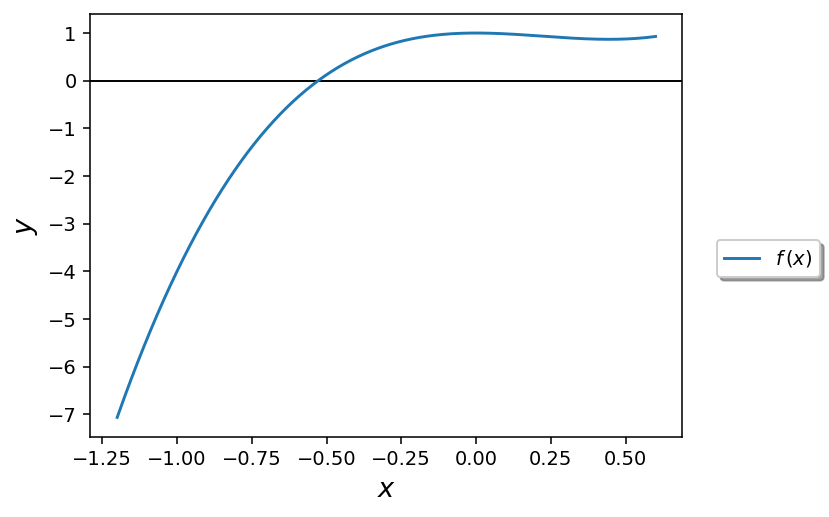

In [ ]:
if __name__ == '__main__':

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  
  x = np.linspace (xmin, xmax, N)
    
  plt.plot (x, f (x), label = r'$f\,(x)$', zorder = 1)
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

Even for modern computers, solving inverse problems using a *brute force* approach is rarely a feasible option. *Brute force* is simple and extremely robust, but it is just too slow for most practical applications.
<br>
<br>
There are numerous methods for solving non-linear inverse problems. Here we shall see a class of root-finding algorithms known as *Householder's methods*.
<br>
<br>
However, for better assessing the power of these methods, let's first see a simpler one known as *bisection method*.
<br>
<br>


####Bisection method

The *bisection method* can be thought of as an improvement of the *brute force method*.
<br>
<br>
It makes use of Bolzano's theorem:
<br>
<br>
**Theorem:** Let $f:[a, b]\,\rightarrow\,\mathbb{R}$ be a continuous function with $f(a)f(b) < 0$. Then, there exists at least one zero of $f$ in $[a, b]$.
<br>
<br>
The basic idea is calculating the value of $f\,(x_i)$, where $x_i\,=\,(a\,+\,b)/2$. If $f\,(x_i)\,f\,(a)\,<\,0$, then we can be sure that the root is in the interval $[a,\,x_i]$. Otherwise, it is in $[x_i,\,b]$. Anyway, following that procedure, after each iteration we halve the search interval.
<br>
<br>
Provided that we find an interval $[a, b]$ that satisfies the Bolzano's theorem, the convergence is guaranteed and, it is many orders of magnitude faster than using a *brute force* algorithm.
<br>
<br>

In [ ]:
def bisection (a, b, epsilon = 1e-15, max_iterations = 100):
  """
  Finds the root of f(x) using the bisection method.
  """
  n = 0
  x0 = 0.5 * (a + b)
  xi = [x0]
  
  error = abs (f (x0))
  
  while error > epsilon and n <= max_iterations:
  
    if f (a) * f (x0) < 0: b = x0

    else: a = x0
      
    x0 = 0.5 * (a + b)
    
    error = abs (f (x0))
    xi += [x0]
    n += 1

  return xi

In [ ]:
# Set the parameters below

# a: left boundary of the initial
#    search interval
# b: right boundary of the initial
#    search interval

if __name__ == "__main__":

  a = -1.0
  b =  0.0

x0: -0.500000000000000   error: 1.25e-01
x1: -0.750000000000000   error: 1.39e+00
x2: -0.625000000000000   error: 5.14e-01
x3: -0.562500000000000   error: 1.67e-01
x4: -0.531250000000000   error: 1.43e-02
x5: -0.515625000000000   error: 5.70e-02
x6: -0.523437500000000   error: 2.18e-02
x7: -0.527343750000000   error: 3.87e-03
x8: -0.529296875000000   error: 5.17e-03
x9: -0.528320312500000   error: 6.43e-04
x10: -0.527832031250000   error: 1.61e-03
x11: -0.528076171875000   error: 4.86e-04
x12: -0.528198242187500   error: 7.82e-05
x13: -0.528137207031250   error: 2.04e-04
x14: -0.528167724609375   error: 6.29e-05
x15: -0.528182983398438   error: 7.66e-06
x16: -0.528175354003906   error: 2.76e-05
x17: -0.528179168701172   error: 9.98e-06
x18: -0.528181076049805   error: 1.16e-06
x19: -0.528182029724121   error: 3.25e-06
x20: -0.528181552886963   error: 1.04e-06
x21: -0.528181314468384   error: 5.77e-08
x22: -0.528181433677673   error: 4.93e-07
x23: -0.528181374073029   error: 2.18e-07
x2

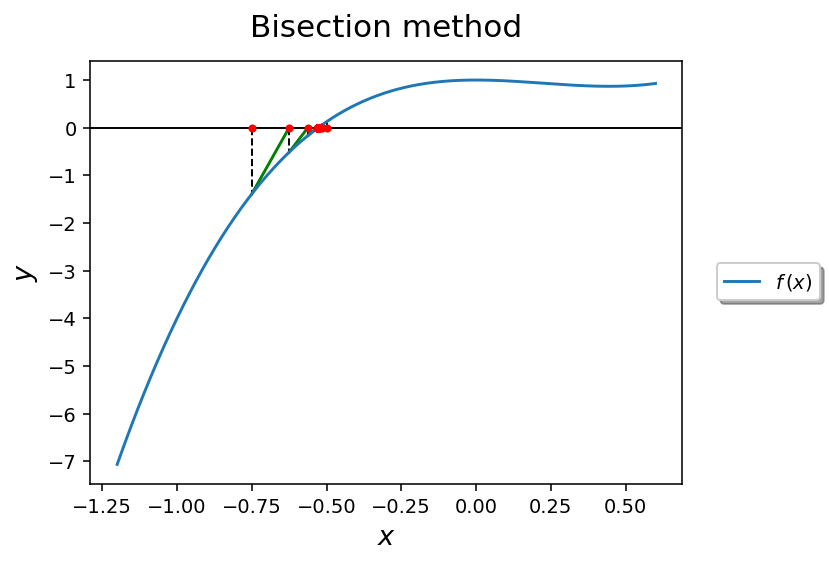

In [ ]:
if __name__ == '__main__':

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  
  xi = bisection (a, b)
  
  for i in range (len (xi)):
    
    print ('x{}: {:.15f}   error: {:.2e}'.format (i, xi[i],
                                                  abs (f (xi[i]))))
    
    plt.scatter (xi[i], 0, color = 'red', s = 10, zorder = 2)
    plt.vlines (x = xi[i], ymin = 0, ymax = f (xi[i]),
                color = 'black', linewidth = 1,
                linestyle = 'dashed', zorder = 0)

    if (i > 0 and i < len (xi) - 1):
  
      plt.plot ((xi[i], xi[i + 1]),
                (f (xi[i]), 0), color = 'green', zorder = 0)
    
  plt.plot (x, f (x), label = r'$f\,(x)$', zorder = 1)
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ("Bisection method", fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####Newton's method

The first-order *Hosehoulder's method* is called *Newton's method*. It consists of linearizing the function $f\,(x)$ by replacing it for its *Taylor series* calculated at an initial guess $x_0$, and truncated at the second term. Then, we solve the resulting linear equation, and the result $x_1$, provided that the conditions of the theorem below are met, is a better approximation for the root. Compared with the bisection method, Newton's method converges much faster (quadratically).
<br>
<br>
\begin{equation}
  f\,(x)
  \,\approx\,
  f\,(x_0)\,+\,f'\,(x_0)\,(x\,-\,x_0)
\end{equation}
<br>
<br>
\begin{equation}
  f\,(x)
  \,=\,0\,
  \,\implies\,f\,(x_0)\,+\,f'\,(x_0)\,(x\,-\,x_0)
  \,=\,0\,
  \implies\,x\,=\,x_0\,-\,\frac{f\,(x_0)}{f'\,(x_0)}
\end{equation}
<br>
<br>
Thus:
<br>
<br>
\begin{equation}
  x_{i\,+\,1} 
  \,=\,x_i\,-\,\frac{f\,(x_i)}{f'\,(x_i)}
\end{equation}
<br>
<br>
**Theorem** (Sufficient conditions for convergence of Newton's method)
<br>
<br>
Let $f\,(x)$ be a $C_2[a,\,b]$ function such as:
<br>
<br>
&emsp;1) $f(a)f(b)\,<\,0$
<br>
<br>
&emsp;2) $f'(x)\,\ne\,0\quad\forall\quad x \in [a,\,b]$
<br>
<br>
&emsp;3) $f''(x)\,>\,0$ ou $f''(x)\,<\,0\quad\forall\quad x \in  [a,\,b]$
<br>
<br>
&emsp;4a) $\left|\frac{f(a)}{f'(a)}\right|\,<\,|a\,-\,b|\,$ e $\,\left|\frac{f(b)}{f'(b)}\right|\,<\,|a\,-\,b|\,$ ou
<br>
<br>
&emsp;4b) $f(x_0)f''(x)\,>\,0$ para qualquer $x \in [a,\,b]$
<br>
<br>
Then, the equation $f(x)\,=\,0\,$ has one and only one solution $z$ in the interval $[a,\,b]$ and the Newton's method converges to that solution for any $x_0$ in $[a,\,b]$ provided that 4a) or 4b) is true.
<br>
<br>

In [ ]:
def dfDx (x):
  """
  Computes the first derivative of f(x)
  """
  return 9 * x ** 2 - 4 * x

In [ ]:
def newton (x0, epsilon = 1e-15, max_iterations = 10):
  """
  Finds the root of f(x) using Newton's method.
  """
  n  = 0
  xi = [x0]
  
  error = abs (f (x0))

  while error > epsilon and n <= max_iterations:
  
    x0 -= f (x0) / dfDx (x0)

    xi += [x0]
    n  += 1

    error = abs (f (x0))

  return xi

In [ ]:
# Set the parameters below

# x0: initial guess for the root 

if __name__ == "__main__":

  x0 = -1

x0: -1.000000000000000   error: 4.00e+00
x1: -0.692307692307692   error: 9.54e-01
x2: -0.557611978664610   error: 1.42e-01
x3: -0.529374984471698   error: 5.53e-03
x4: -0.528183403165129   error: 9.60e-06
x5: -0.528181326954074   error: 2.91e-11
x6: -0.528181326947777   error: 2.22e-16


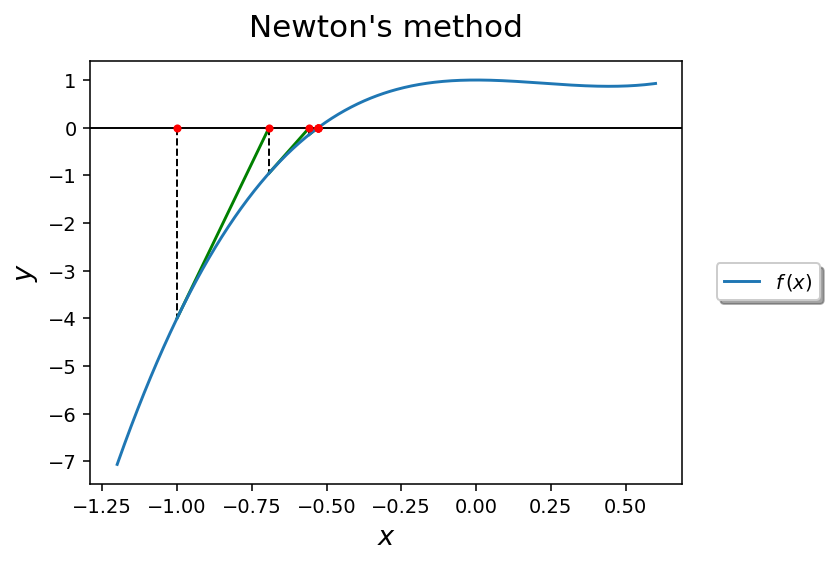

In [ ]:
if __name__ == '__main__':

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  
  xi = newton (x0)
  
  for i in range (len (xi)):
    
    print ('x{}: {:.15f}   error: {:.2e}'.format (i, xi[i],
                                                  abs (f (xi[i]))))
    
    plt.scatter (xi[i], 0, color = 'red', s = 10, zorder = 2)
    plt.vlines (x = xi[i], ymin = 0, ymax = f (xi[i]),
                color = 'black', linewidth = 1,
                linestyle = 'dashed', zorder = 0)

    if (i < len (xi) - 1):
  
      plt.plot ((xi[i], xi[i + 1]),
                (f (xi[i]), 0), color = 'green', zorder = 0)
    
  plt.plot (x, f (x), label = r'$f\,(x)$', zorder = 1)
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ("Newton's method", fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####Halley's method

The second-order *Hosehoulder's method* is known as *Halley's method*. We can derive it similarly, but instead of truncating the *Taylor series* at the second term we do it at the third one:
<br>
<br>
\begin{equation}
  f\,(x)
  \,\approx\,
  f\,(x_0)\,+\,f'\,(x_0)\,(x\,-\,x_0)
  \,+\,\frac{f''\,(x_0)\,{(x\,-\,x_0)}^2}{2}
\end{equation}
<br>
<br>
\begin{equation}
  f\,(x)
  \,=\,0
  \,\implies\,f\,(x_0)\,+\,f'\,(x_0)\,(x\,-\,x_0)
  \,+\,\frac{f''\,(x_0)\,{(x\,-\,x_0)}^2}{2} = 0
\end{equation}
<br>
<br>
\begin{equation}
  f\,(x_0)\,+\,(x\,-\,x_0) \left[f'\,(x_0)
  \,+\,\frac{1}{2}\,f''\,(x_0)\,(x\,-\,x_0)\right]
  \,=\,0
\end{equation}
<br>
<br>
\begin{equation}
  x
  \,=\,x_0\,-\,\frac{f\,(x_0)}{f'\,(x_0)
  \,+\,\frac{1}{2}\,f''\,(x_0)\,(x\,-\,x_0)}
\end{equation}
<br>
<br>
Now, we can eliminate $x$ by using the identity from the previous derivation:
<br>
<br>
\begin{equation}
  (x\,-\,x_0)
  \,=\,-\frac{f\,(x_0)}{f'\,(x_0)}
  \,\implies\,x\,=\,x_0\,-\,\frac{f\,(x_0)}{f'\,(x_0)
  \,-\,\frac{1}{2}\,f''\,(x_0)\,\frac{f\,(x_0)}{f'\,(x_0)}}
\end{equation}
<br>
<br>
Thus:
<br>
<br>
\begin{equation}
  x_{n\,+\,1}
  \,=\,x_n 
  \,-\,\frac{2\,f\,(x_n)\,f'\,(x_n)}{{2\,f'\,(x_n)}^2
  \,-\,f\,(x_n)\,f''\,(x_n)}
\end{equation}
<br>
<br>
Halley's method presents cubic convergence.
<br>
<br>

In [ ]:
def d2fDx2 (x):
  """
  Computes the second derivative of f(x)
  """
  return 18 * x - 4

In [ ]:
def halley (x0, epsilon = 1e-15, max_iterations = 10):
  """
  Finds the root of f(x) using Halley's method.
  """
  n  = 0
  xi = [x0]
  
  error = abs (f (x0))
  
  while error > epsilon and n <= max_iterations:
  
    x0 -= 2 * f (x0) * dfDx (x0)\
            / (2 * dfDx (x0) ** 2 - f (x0) * d2fDx2 (x0))
    
    xi += [x0]
    n  += 1

    error = abs (f (x0))

  return xi

x0: -1.000000000000000   error: 4.00e+00
x1: -0.584000000000000   error: 2.80e-01
x2: -0.528406588626530   error: 1.04e-03
x3: -0.528181326964740   error: 7.84e-11
x4: -0.528181326947777   error: 2.22e-16


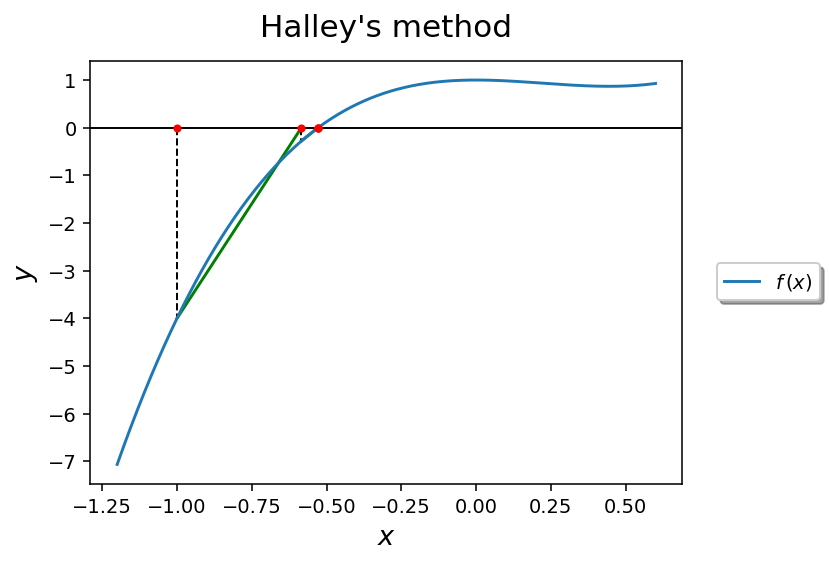

In [ ]:
if __name__ == '__main__':

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  
  xi = halley (x0)
  
  for i in range (len (xi)):
    
    print ('x{}: {:.15f}   error: {:.2e}'.format (i, xi[i],
                                                  abs (f (xi[i]))))
    
    plt.scatter (xi[i], 0, color = 'red', s = 10, zorder = 2)
    plt.vlines (x = xi[i], ymin = 0, ymax = f (xi[i]),
                color = 'black', linewidth = 1,
                linestyle = 'dashed', zorder = 0)

    if (i < len (xi) - 1):
  
      plt.plot ((xi[i], xi[i + 1]),
                (f (xi[i]), 0), color = 'green', zorder = 0)
    
  plt.plot (x, f (x), label = r'$f\,(x)$', zorder = 1)
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ("Halley's method", fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####Third-order Householder's method

The third-order *Householder's method* is rarely used because its implementation requires additional computational effort, which is not compensated by the faster (quartic) convergence rate. The same applies with even more intensity for higher orders.
<br>
<br>
The iterative scheme for the third-order method is:
<br>
<br>
\begin{equation}
  x_{n\,+\,1}
  \,=\,x_n\,-\,\frac{6\,f\,(x_n)\,{f'\,(x_n)}^2
  \,-\,3\,{f\,(x_n)}^2\,f''\,(x_n)}{{6\,f'\,(x_n)}^3
  \,-\,6\,f\,(x_n)\,f'\,(x_n)\,f''\,(x_n)
  \,+\,{f\,(x_n)}^2\,f'\,(x_n)}
\end{equation}
<br>
<br>

In [ ]:
def d3fDx3 (x):
  """
  Computes the third derivative of f(x)
  """
  return 18

In [ ]:
def householder3rd (x0, epsilon = 1e-15, max_iterations = 10):
  """
  Finds the root of f(x) using the third-order Householder's method.
  """
  n  = 0
  xi = [x0]
  
  error = abs (f (x0))
  
  while error > epsilon and n <= max_iterations:
  
    x0 -= (6 * f (x0) * dfDx (x0) ** 2
           - 3 * f (x0) ** 2 * d2fDx2 (x0)) / (6 * dfDx (x0) ** 3
           - 6 * f (x0) * dfDx (x0) * d2fDx2 (x0)
           + f (x0) ** 2 * dfDx (x0))
    
    xi += [x0]
    n  += 1

    error = abs (f (x0))

  return xi

x0: -1.000000000000000   error: 4.00e+00
x1: -0.540300337113086   error: 5.70e-02
x2: -0.528180534099943   error: 3.67e-06
x3: -0.528181326947777   error: 2.22e-16


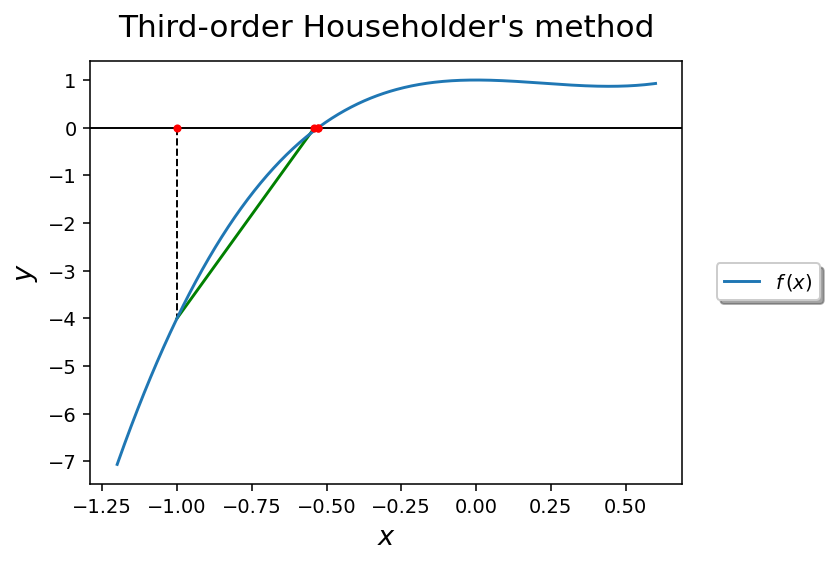

In [ ]:
if __name__ == '__main__':

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  
  xi = householder3rd (x0)
  
  for i in range (len (xi)):
    
    print ('x{}: {:.15f}   error: {:.2e}'.format (i, xi[i],
                                                  abs (f (xi[i]))))
    
    plt.scatter (xi[i], 0, color = 'red', s = 10, zorder = 2)
    plt.vlines (x = xi[i], ymin = 0, ymax = f (xi[i]),
                color = 'black', linewidth = 1,
                linestyle = 'dashed', zorder = 0)

    if (i < len (xi) - 1):
  
      plt.plot ((xi[i], xi[i + 1]),
                (f (xi[i]), 0), color = 'green', zorder = 0)
    
  plt.plot (x, f (x), label = r'$f\,(x)$', zorder = 1)
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ("Third-order Householder's method", fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

The same idea can be generalized to any number of dimensions for solving inverse problems in $\mathbb{R}^{n}$.
<br>
<br>

####References

“Householder's method.” *Wikipedia*, Wikimedia Foundation, 9 May 2020, https://en.wikipedia.org/wiki/Householder%27s_method [Accessed 8 August 2020]. 
<br>
<br>
Weisstein, Eric W. “Bolzano's Theorem.” From Wolfram MathWorld, mathworld, http://mathworld.wolfram.com/BolzanosTheorem.html [Accessed 8 August 2020].
<br>
<br>
Weisstein, Eric W. “Newton's Method.” From Wolfram MathWorld, mathworld, http://mathworld.wolfram.com/NewtonsMethod.html [Accessed 8 August 2020].
<br>
<br>
Weisstein, Eric W. “Halley's Method.” From Wolfram MathWorld, mathworld, http://mathworld.wolfram.com/HalleysMethod.html [Accessed 8 August 2020].
<br>
<br>
Weisstein, Eric W. “Zeros of nonlinear functions.” From Wolfram MathWorld, mathworld, https://www.unioviedo.es/compnum/labs/lab04_ne/lab04_ne.html [Accessed 8 August 2020].